# 2018 World Cup Quarter Finals Analysis

   - Fifa Dataset available at [Kaggle](https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset)

### Libraries and Dataset

In [631]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from math import pi
from IPython.display import HTML

pd.options.display.max_columns = None

In [632]:
toggle_code = '''
<script>
   code_show=true;

   function code_toggle() {
        if (code_show){
            $('div.input').hide();
           } else {
            $('div.input').show();
           }
        code_show = !code_show
   }

   $( document ).ready(code_toggle);
</script>

The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.'''

HTML(toggle_code)

In [11]:
df = pd.read_csv('CompleteDataset.csv')
df.drop('Unnamed: 0', inplace = True, axis=1)

/home/calestini/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [581]:
df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
teams_advancing = ['Brazil','Belgium','France','Uruguay','Russia','Croatia','Sweden','England']
df_qf = df[df['Nationality'].isin(teams_advancing)]

### Players available each country

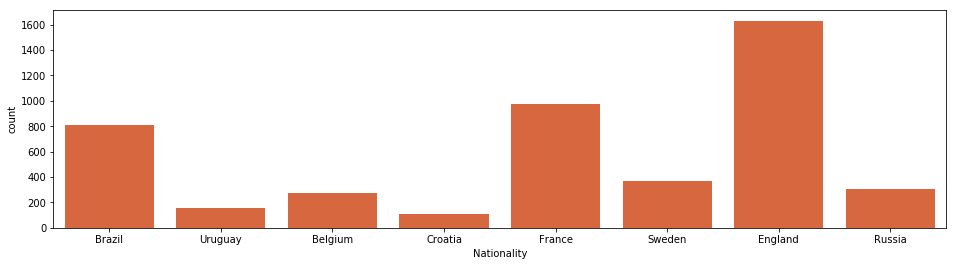

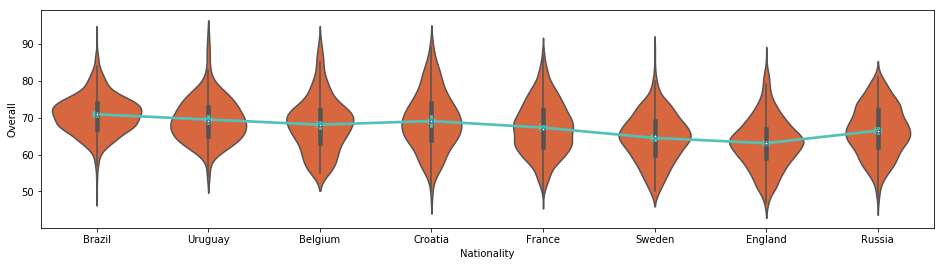

In [634]:
plt.figure(figsize=(16,4))
sns.countplot(df_qf['Nationality'], color = '#f15b24')

plt.figure(figsize=(16,4))
sns.violinplot(df_qf['Nationality'], df_qf['Overall'], color = '#f15b24')
sns.pointplot(df_qf['Nationality'], df_qf['Overall'], color = '#52c2b8')

## Filtering squads in the WC

In [225]:
england = {'Jordan Pickford':1086,
'Kyle Walker': 161,
'Danny Rose': 279,
'Eric Dier':232,
'John Stones': 569,
'Harry Maguire': 1214,
'Jesse Lingard': 746,
'Jordan Henderson': 261,
'Harry Kane': 46,
'Raheem Sterling': 229,
'Jamie Vardy': 316,
'Kieran Trippier': 907,
'Jack Butland':321,
'Danny Welbeck': 458,
'Gary Cahill': 123,
'Phil Jones': 598,
'Fabian Delph': 1082,
'Ashley Young': 1726,
'Marcus Rashford': 392,
'Dele Alli': 96,
'Ruben Loftus-Cheek': 5427,
'Trent Alexander-Arnold': 6160,
'Nick Pope': 6934}

In [226]:
uruguay = {
'Fernando Muslera': 265,
'José Giménez': 130,
'Diego Godín': 26,
'Guillermo Varela': None,
'Carlos Sánchez': 1157,
'Rodrigo Bentancur': 6486,
'Cristian Rodríguez': 1888,
'Nahitan Nández': 5048,
'Luis Suárez': 3,
'Giorgian De Arrascaeta': None,
'Cristhian Stuani': 1130,
'Martín Campaña': 522,
'Gastón Silva': 3386,
'Lucas Torreira': 1969,
'Matías Vecino': 713,
'Maxi Pereira': None,
'Diego Laxalt': 726,
'Maxi Gómez': 2899,
'Sebastián Coates': 336,
'Jonathan Urretaviscaya': 2395,
'Edinson Cavani': 38,
'Martín Cáceres': 1184,
'Martín Silva': 4667,
}

In [227]:
france = {
'Hugo Lloris': 29,
'Benjamin Pavard': 3397,
'Presnel Kimpembe': 991,
'Raphaël Varane': 70,
'Samuel Umtiti': 142,
'Paul Pogba': 35,
'Antoine Griezmann': 21,
'Thomas Lemar': 132,
'Olivier Giroud': 269,
'Kylian Mbappé': 127,
'Ousmane Dembélé': 128,
'Corentin Tolisso': 201,
'NGolo Kanté': 33,
'Blaise Matuidi': 87,
'Steven Nzonzi': None,
'Steve Mandanda': 285,
'Adil Rami': 366,
'Nabil Fekir': 203,
'Djibril Sidibé': 584,
'Florian Thauvin': 222,
'Lucas Hernández': 1097,
'Benjamin Mendy': 756,
'Alphonse Areola': 603,
}

In [228]:
brazil = {
'Alisson': 397,
'Thiago Silva': 30,
'Miranda': 63,
'Pedro Geromel': None,
'Casemiro': 71,
'Filipe Luís': 89,
'Douglas Costa': 247,
'Renato Augusto': 488,
'Gabriel Jesus': 299,
'Neymar': 2,
'Philippe Coutinho': 54,
'Marcelo': 39,
'Marquinhos': 140,
'Danilo': 786,
'Paulinho': 358,
'Cássio': 1837,
'Fernandinho': 295,
'Fred': 406,
'Willian': 114,
'Roberto Firmino': 145,
'Taison': 252,
'Fagner': None,
'Ederson': 135 
}

In [229]:
belgium = {
'Thibaut Courtois': 12,
'Toby Alderweireld': 56,
'Thomas Vermaelen': 806,
'Vincent Kompany': 90,
'Jan Vertonghen': 86,
'Axel Witsel': 274,
'Kevin De Bruyne': 11,
'Marouane Fellaini': 645,
'Romelu Lukaku': 50,
'Eden Hazard': 7,
'Yannick Carrasco': 69,
'Simon Mignolet': 372,
'Koen Casteels': 893,
'Dries Mertens': 61,
'Thomas Meunier': 323,
'Thorgan Hazard': 421,
'Youri Tielemans': 394,
'Adnan Januzaj':1160 ,
'Mousa Dembélé': 183,
'Dedryck Boyata': 3872,
'Michy Batshuayi': 417,
'Nacer Chadli': 781,
'Leander Dendoncker': 540 
}

In [230]:
sweden = {
'Robin Olsen': 2495,
'Mikael Lustig': 2747,
'Victor Lindelöf': 525,
'Andreas Granqvist': 501,
'Martin Olsson': 1859,
'Ludwig Augustinsson': 3151,
'Sebastian Larsson': 1399,
'Albin Ekdal': 1320,
'Marcus Berg': 472,
'Emil Forsberg': 139,
'John Guidetti': 785,
'Karl-Johan Johnsson': 1889,
'Gustav Svensson': 2125,
'Filip Helander': 3141,
'Oscar Hiljemark': 3135,
'Emil Krafth': 2712,
'Viktor Claesson': 3139,
'Pontus Jansson': 1113,
'Marcus Rohdén': 4631,
'Ola Toivonen': 1864,
'Jimmy Durmaz': 1624,
'Isaac Kiese Thelin': 4525,
'Kristoffer Nordfeldt': 2980,
}

In [231]:
russia = {
'Igor Akinfeev': 675,
'Mário Fernandes': 342,
'Ilya Kutepov': 2723,
'Sergei Ignashevich': 839,
'Andrei Semyonov': None,
'Denis Cheryshev': 748,
'Daler Kuzyayev': None,
'Yury Gazinsky': None,
'Alan Dzagoev': 455,
'Fyodor Smolov': 457,
'Roman Zobnin': 1127,
'Andrey Lunyov': None,
'Fyodor Kudryashov': 2720,
'Vladimir Granat': 3364,
'Aleksei Miranchuk': 2214,
'Anton Miranchuk': 7324,
'Aleksandr Golovin': 1413,
'Yuri Zhirkov': 1319,
'Aleksandr Samedov': 677,
'Vladimir Gabulov': 2337,
'Aleksandr Yerokhin': None,
'Artem Dzyuba': 890,
'Igor Smolnikov': 622,
}

In [233]:
croatia = {
'Dominik Livaković': None,
'Šime Vrsaljko': 567,
'Ivan Strinić': 1908,
'Ivan Perišić': 112,
'Vedran Ćorluka': 266,
'Dejan Lovren': 339,
'Ivan Rakitić': 41,
'Mateo Kovačić': 218,
'Andrej Kramarić': 305,
'Luka Modrić': 14,
'Marcelo Brozović':306,
'Lovre Kalinić': 927,
'Tin Jedvaj': 1404,
'Filip Bradarić': None,
'Duje Ćaleta-Car': 4797,
'Nikola Kalinić': 359,
'Mario Mandžukić': 170,
'Ante Rebić': 3622,
'Milan Badelj': 774,
'Marko Pjaca': 1533,
'Domagoj Vida': None,
'Josip Pivarić': None,
'Danijel Subašić': 76,
}

Filter by players in the WC

In [571]:
#df_qf[df_qf['Name'].str.contains("Subašić")]

players = []

all_teams = england
all_teams.update(sweden)
all_teams.update(belgium)
all_teams.update(brazil)
all_teams.update(france)
all_teams.update(uruguay)
all_teams.update(russia)
all_teams.update(croatia)

In [235]:
for items in all_teams:
    players.append(all_teams[items])

In [269]:
df_qf['index'] = df_qf.index

df_final = df_qf[df_qf['index'].isin(players)].reset_index()

/home/calestini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [475]:
df_final.head()

,level_0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,index
0,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000,280000,2100,9,5,9,8,9,9,7,8,9,8,8,9,9,15,15,11,6,3,6,7,7,2,8,9,8,8,8,3,9,7,2,5,8,8,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,2
1,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000,510000,2291,8,7,8,6,9,8,7,8,8,9,8,27,25,31,33,37,7,4,6,6,8,3,8,9,9,8,8,3,7,8,4,8,8,8,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,3
2,7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,90500000,295000,2096,9,5,9,9,9,8,8,8,9,8,7,11,12,6,8,8,5,4,5,8,8,2,8,8,8,8,7,2,8,7,2,6,8,7,88.0,47.0,61.0,87.0,81.0,183277,88.0,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,LW,88.0,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0,7
3,11,K. De Bruyne,26,https://cdn.sofifa.org/48/18/players/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,92,Manchester City,https://cdn.sofifa.org/24/18/teams/10.png,83000000,285000,2162,7,6,8,7,8,8,9,8,8,8,8,15,13,5,10,13,5,5,6,8,8,3,7,8,8,9,8,4,7,8,5,7,9,8,86.0,57.0,70.0,85.0,84.0,192985,86.0,66.0,57.0,84.0,70.0,85.0,85.0,81.0,85.0,71.0,RM CM CAM,86.0,66.0,57.0,84.0,70.0,85.0,85.0,81.0,85.0,71.0,81.0,11
4,12,T. Courtois,25,https://cdn.sofifa.org/48/18/players/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,92,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,59000000,190000,1282,4,2,6,4,2,5,1,1,1,1,1,85,91,69,86,88,1,1,6,3,1,1,2,1,8,3,3,1,5,3,1,7,4,1,NaN,NaN,NaN,NaN,NaN,192119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


In [271]:
df_final['Value'] = df_final['Value'].apply(lambda x: int(x.replace("€", "").replace('M','00000')\
                                            .replace('K','00').replace('.','')) if '.' in x else int(x.replace("€", "")\
                                            .replace('M','000000').replace('K','000')))

df_final['Wage'] = df_final['Wage'].apply(lambda x: int(x.replace("€", "")\
                                            .replace('M','000000').replace('K','000')))

In [265]:
variables = [
    'Acceleration','Aggression','Agility','Balance','Ball control','Composure','Crossing','Curve','Dribbling',
    'Finishing','Free kick accuracy','Heading accuracy','Interceptions','Jumping','Long passing','Long shots',
    'Marking','Penalties','Positioning','Reactions','Short passing','Shot power','Sliding tackle','Sprint speed',
    'Stamina','Standing tackle','Strength','Vision','Volleys'
]

In [273]:
for col in variables:
    df_final[col] = df_final[col].apply(lambda x: int(x.strip('+')[0]))

### Overall ratings

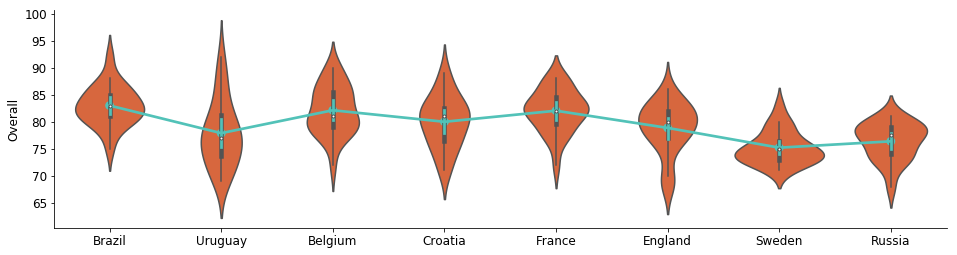

In [655]:
fig, ax = plt.subplots(figsize=(16,4))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.violinplot(df_final['Nationality'], df_final['Overall'], color = '#f15b24')
sns.pointplot(df_final['Nationality'], df_final['Overall'], color='#52c2b8');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Overall', fontsize=12)
plt.xlabel('');
plt.savefig('overall.png', dpi = 300)

/home/calestini/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


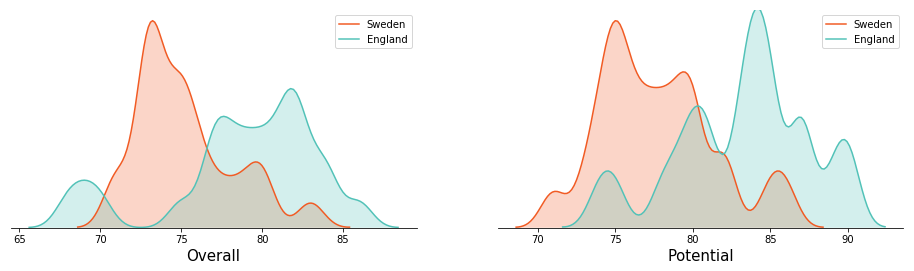

In [689]:
swe_eng = df_final[df_final['Nationality'].isin(['England','Sweden'])]


fig, ax = plt.subplots(figsize=(16,4))

ax1 = plt.subplot(1,2,1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)

plt.subplot(1,2,1)
sns.kdeplot(sweden['Overall'], bw=.8, shade=True, label = 'Sweden', color = '#f15b24')
sns.kdeplot(england['Overall'], bw=.8, shade=True, label = 'England', color='#52c2b8')
plt.yticks([])
plt.xlabel('Overall', fontsize=15)

ax2 = plt.subplot(1,2,2)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.subplot(1,2,2)
sns.kdeplot(england['Potential'], bw=.8, shade=True, label = 'England', color='#52c2b8')
sns.kdeplot(sweden['Potential'], bw=.8, shade=True, label = 'Sweden', color = '#f15b24')
plt.yticks([])
plt.xlabel('Potential', fontsize=15)
plt.savefig('england_sweden_dist.png', dpi = 300);

In [684]:
np.std(sweden['Overall'])

2.9921131363626525

In [685]:
np.std(england['Overall'])

4.627933596777451

In [690]:
np.std(df_final[df_final['Nationality'] == 'Brazil']['Overall'])

3.625307868699863

In [691]:
np.std(df_final[df_final['Nationality'] == 'Uruguay']['Overall'])

5.999166608788257

In [677]:
summary = df_final.groupby('Nationality').mean().reset_index()

### Head 2 Head

In [649]:
#radar chart
def h2h(team1, team2):
    """
    Compare teams in a match in one radar chart
    https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
    """
    summary1 = summary[['Nationality']+variables]

    plt.figure(figsize=(16,12))
    head_to_head= [team1, team2]

    summary2 = summary1[summary1['Nationality'].isin(head_to_head)].reset_index(drop=True)

    # ------- PART 1: Create background

    # number of variable
    categories=list(summary2)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, fontsize=13, color = 'black')
    plt.setp(ax.spines.values(), linewidth=0.2)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([4,6], ["4","6"], color="grey", size=7)
    plt.ylim(2,8)


    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

    # Ind1
    values=summary2.loc[0].drop('Nationality').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, '#f15b24', linewidth=4, linestyle='solid', label=summary2.iloc[0,0])
    ax.fill(angles, values, '#f15b24', alpha=0.1)

    # Ind2
    values=summary2.loc[1].drop('Nationality').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, '#52c2b8', linewidth=4, linestyle='solid', label=summary2.iloc[1,0])
    ax.fill(angles, values, '#52c2b8', alpha=0.1)

    # Add legend
    plt.legend(loc='center',ncol=2, fontsize = 24)#, bbox_to_anchor=(0.1, 0.1))
    plt.show()
    #plt.title('Belgium vs Brazil')

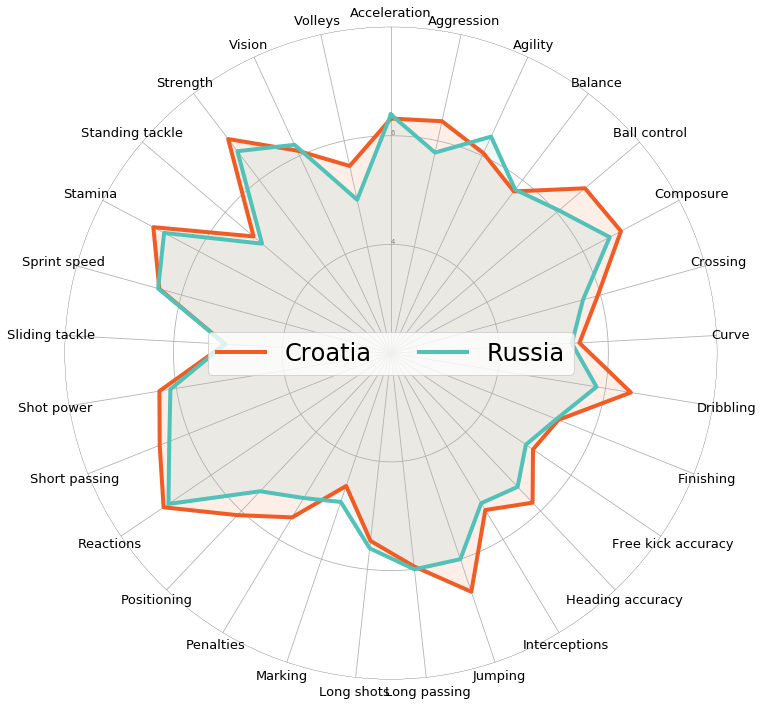

In [650]:
h2h('Russia','Croatia')

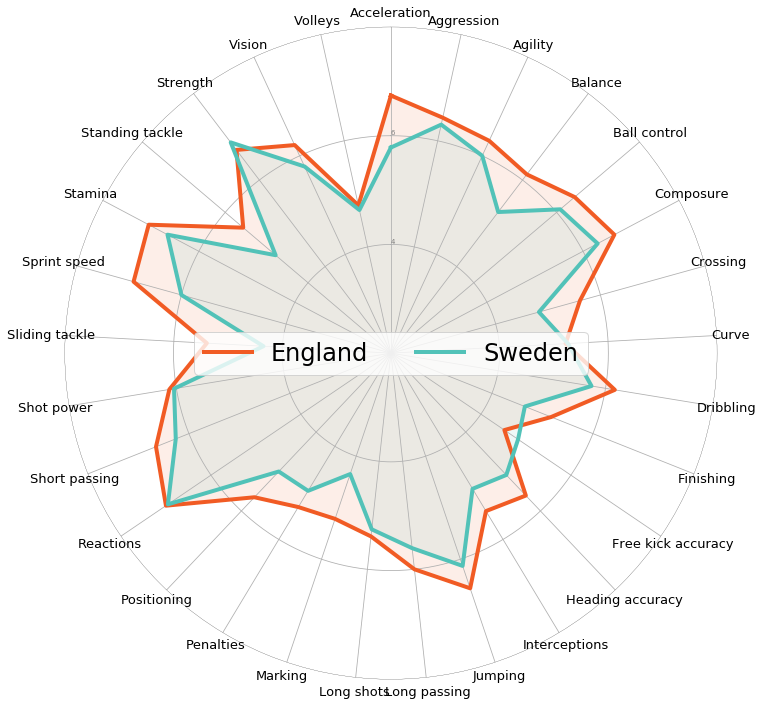

In [651]:
h2h('Sweden','England')

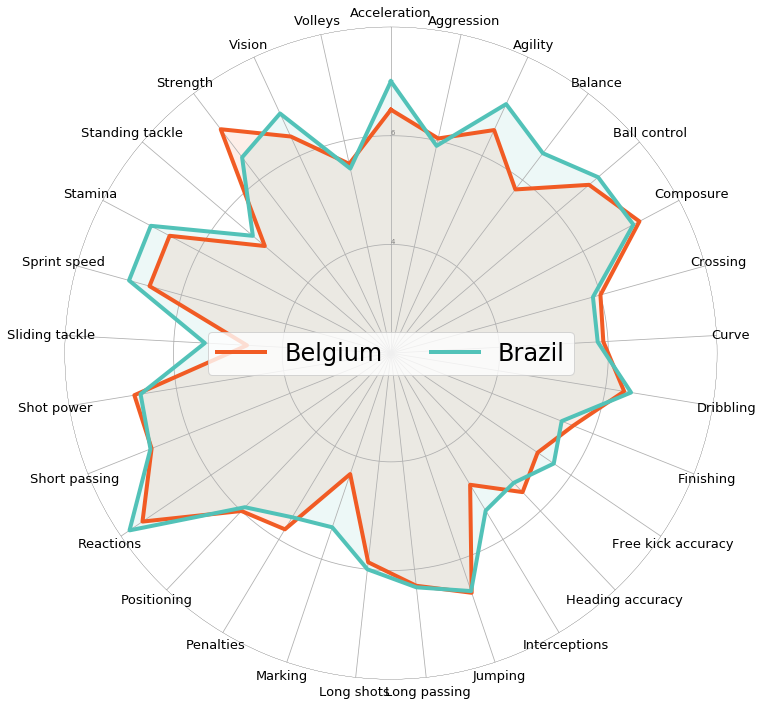

In [652]:
h2h('Brazil','Belgium')

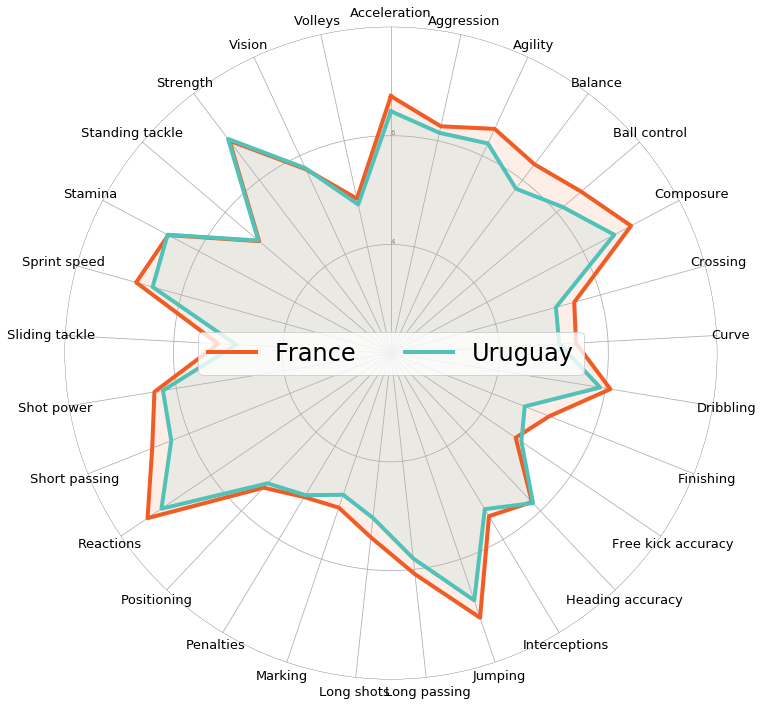

In [653]:
h2h('France','Uruguay')

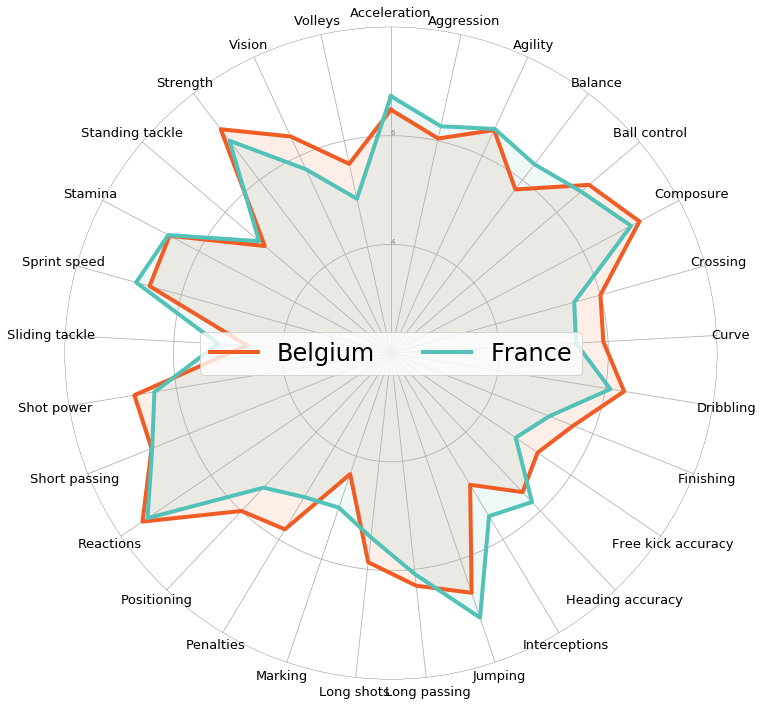

In [699]:
h2h('Belgium','France')

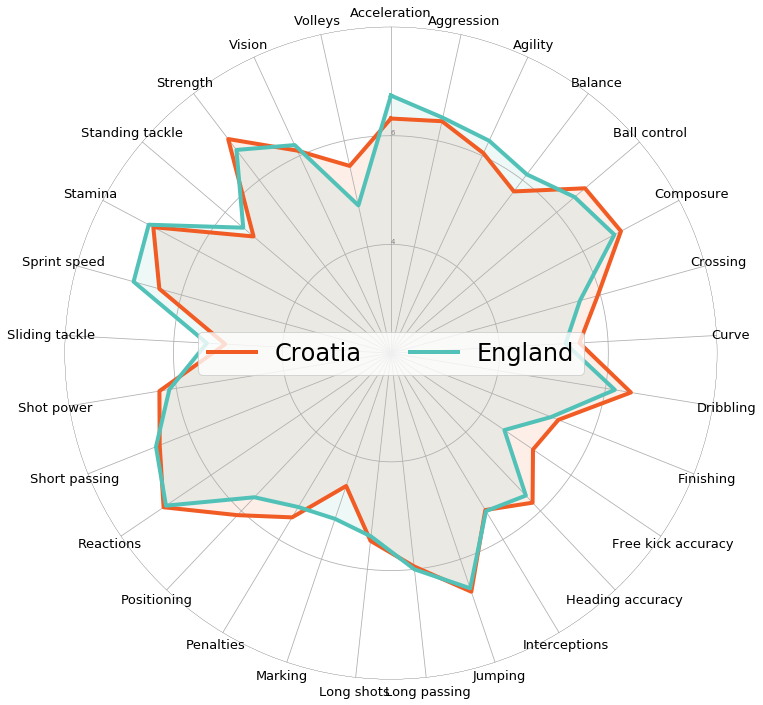

In [698]:
h2h('Croatia','England')

### Average Wage

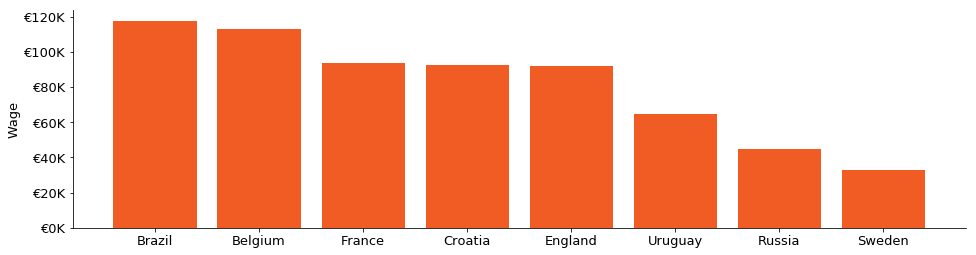

In [660]:
sum_val = df_final.groupby('Nationality').mean().reset_index()[['Nationality','Wage']].sort_values(['Wage'], ascending=False).reset_index(drop=True)

from matplotlib.ticker import FuncFormatter

def thousands(x, pos):
    'The two args are the value and tick position'
    #https://matplotlib.org/examples/pylab_examples/custom_ticker1.html
    return '€%1.fK' % (x*1e-3)

formatter = FuncFormatter(thousands)

fig, ax = plt.subplots(figsize=(16,4))
ax.yaxis.set_major_formatter(formatter)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.bar(range(len(sum_val)), sum_val['Wage'], color='#f15b24')
plt.xticks(range(len(sum_val)), sum_val['Nationality'], fontsize=13)
plt.yticks(fontsize=13);
plt.ylabel('Wage', fontsize=13)
#plt.title('Average Wage per Team', fontsize=18);
plt.savefig('wage.png', dpi = 300)

### Average Player Value

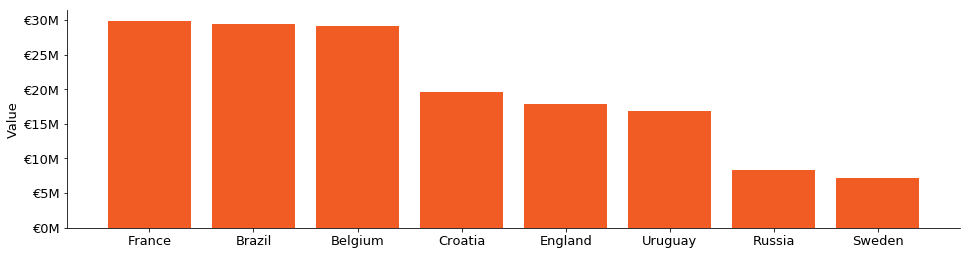

In [661]:
sum_val = df_final.groupby('Nationality').mean().reset_index()[['Nationality','Value']].sort_values(['Value'], ascending=False).reset_index(drop=True)

from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    #https://matplotlib.org/examples/pylab_examples/custom_ticker1.html
    return '€%1.fM' % (x*1e-6)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots(figsize=(16,4))
ax.yaxis.set_major_formatter(formatter)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.bar(range(len(sum_val)), sum_val['Value'], color='#f15b24')
plt.xticks(range(len(sum_val)), sum_val['Nationality'], fontsize=13)
plt.yticks(fontsize=13);
plt.ylabel('Value', fontsize=13)

#plt.title('Average Player Value', fontsize=18);
plt.savefig('value.png', dpi = 300)

### Age Distribution

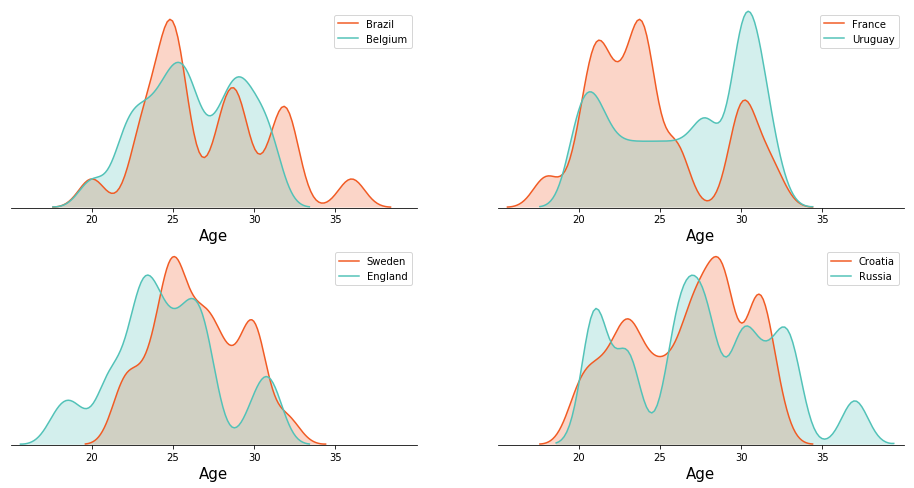

In [692]:
h2h_teams = [['Brazil', 'Belgium'],['France','Uruguay'],['Sweden','England'],['Croatia','Russia']]

fig, ax = plt.subplots(figsize=(16,8))

for i in range(1, len(h2h_teams)+1):

    ax1 = plt.subplot(2,2,i)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    home_team = h2h_teams[i-1][0]
    away_team = h2h_teams[i-1][1]

    home = df_final[df_final['Nationality']==home_team]
    away = df_final[df_final['Nationality']==away_team]

    sns.kdeplot(home['Age'], bw=.8, shade=True, label = home_team, color = '#f15b24')
    sns.kdeplot(away['Age'], bw=.8, shade=True, label = away_team, color='#52c2b8')
    plt.xticks([20,25,30,35])
    plt.xlim(15,40)

    plt.legend(loc='upper right')
    plt.yticks([])
    plt.xlabel('Age', fontsize=15)
    
    plt.savefig('age.png', dpi = 300)

#### Importance of Age in Potential ratings

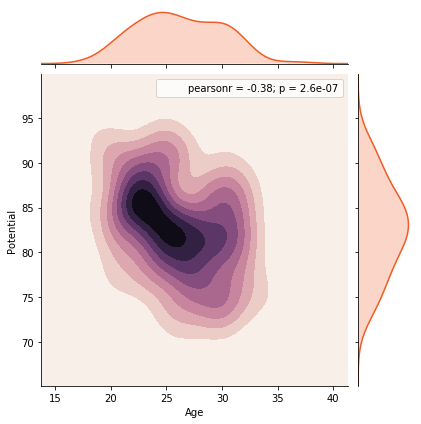

In [656]:
sns.jointplot(x="Age", y="Potential", data=df_final, kind="kde", cmap=cmap, color='#f15b24');
plt.savefig('age_potential.png', dpi = 300)

### Clubs with most players in the Quarter-Finals

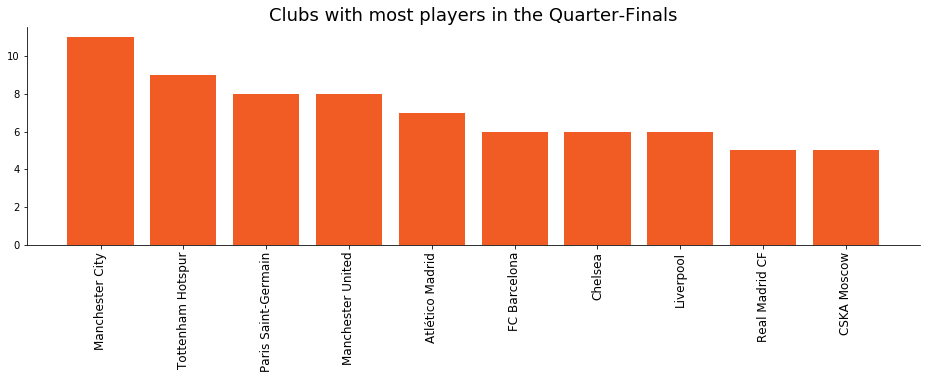

In [696]:
per_leagues = df_final.groupby('Club').count().reset_index()[['Club','Name']].sort_values(['Name'], ascending=False).reset_index(drop=True)
per_leagues = per_leagues.iloc[:10,:]

fig, ax = plt.subplots(figsize=(16,4))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)

plt.bar(range(len(per_leagues)), per_leagues['Name'], color='#f15b24')
plt.xticks(range(len(per_leagues)), per_leagues['Club'], rotation='vertical', fontsize=12);
#plt.yticks([]);
plt.title('Clubs with most players in the Quarter-Finals', fontsize=18);